ADABOOST REGRESSOR
Mean squared error = 3662.81
Explained variance score = 0.39


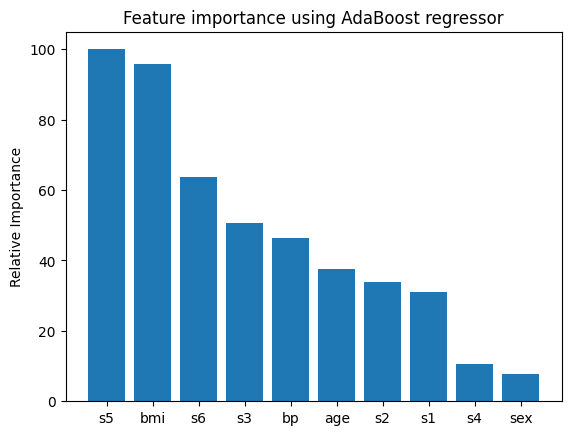

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import AdaBoostRegressor 
from sklearn import datasets 
from sklearn.metrics import mean_squared_error, explained_variance_score 
from sklearn import model_selection
from sklearn.utils import shuffle 

housing_data = datasets.load_diabetes() 

X, y = shuffle(housing_data.data, housing_data.target, random_state=7) 

X_train, X_test, y_train, y_test = model_selection.train_test_split( 
            X, y, test_size=0.2, random_state=7) 

regressor = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), 
                              n_estimators=400, random_state=7) 
regressor.fit(X_train, y_train) 

y_pred = regressor.predict(X_test) 
mse = mean_squared_error(y_test, y_pred) 
evs = explained_variance_score(y_test, y_pred ) 
print("ADABOOST REGRESSOR") 
print("Mean squared error =", round(mse, 2)) 
print("Explained variance score =", round(evs, 2)) 

feature_importances = regressor.feature_importances_ 
feature_names = np.array(housing_data.feature_names)

feature_importances = 100.0 * (feature_importances / max(feature_importances))

index_sorted = np.flipud(np.argsort(feature_importances)) 

pos = np.arange(index_sorted.shape[0]) + 0.5

plt.figure() 
plt.bar(pos, feature_importances[index_sorted], align='center') 
plt.xticks(pos, feature_names[index_sorted]) 
plt.ylabel('Relative Importance') 
plt.title('Feature importance using AdaBoost regressor') 
plt.show() 